<a href="https://colab.research.google.com/github/rlmariz/reconhecimentos-padroes/blob/main/ReconhecimentoPadr%C3%B5es_Lista02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import xlrd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from imblearn.under_sampling import RandomUnderSampler

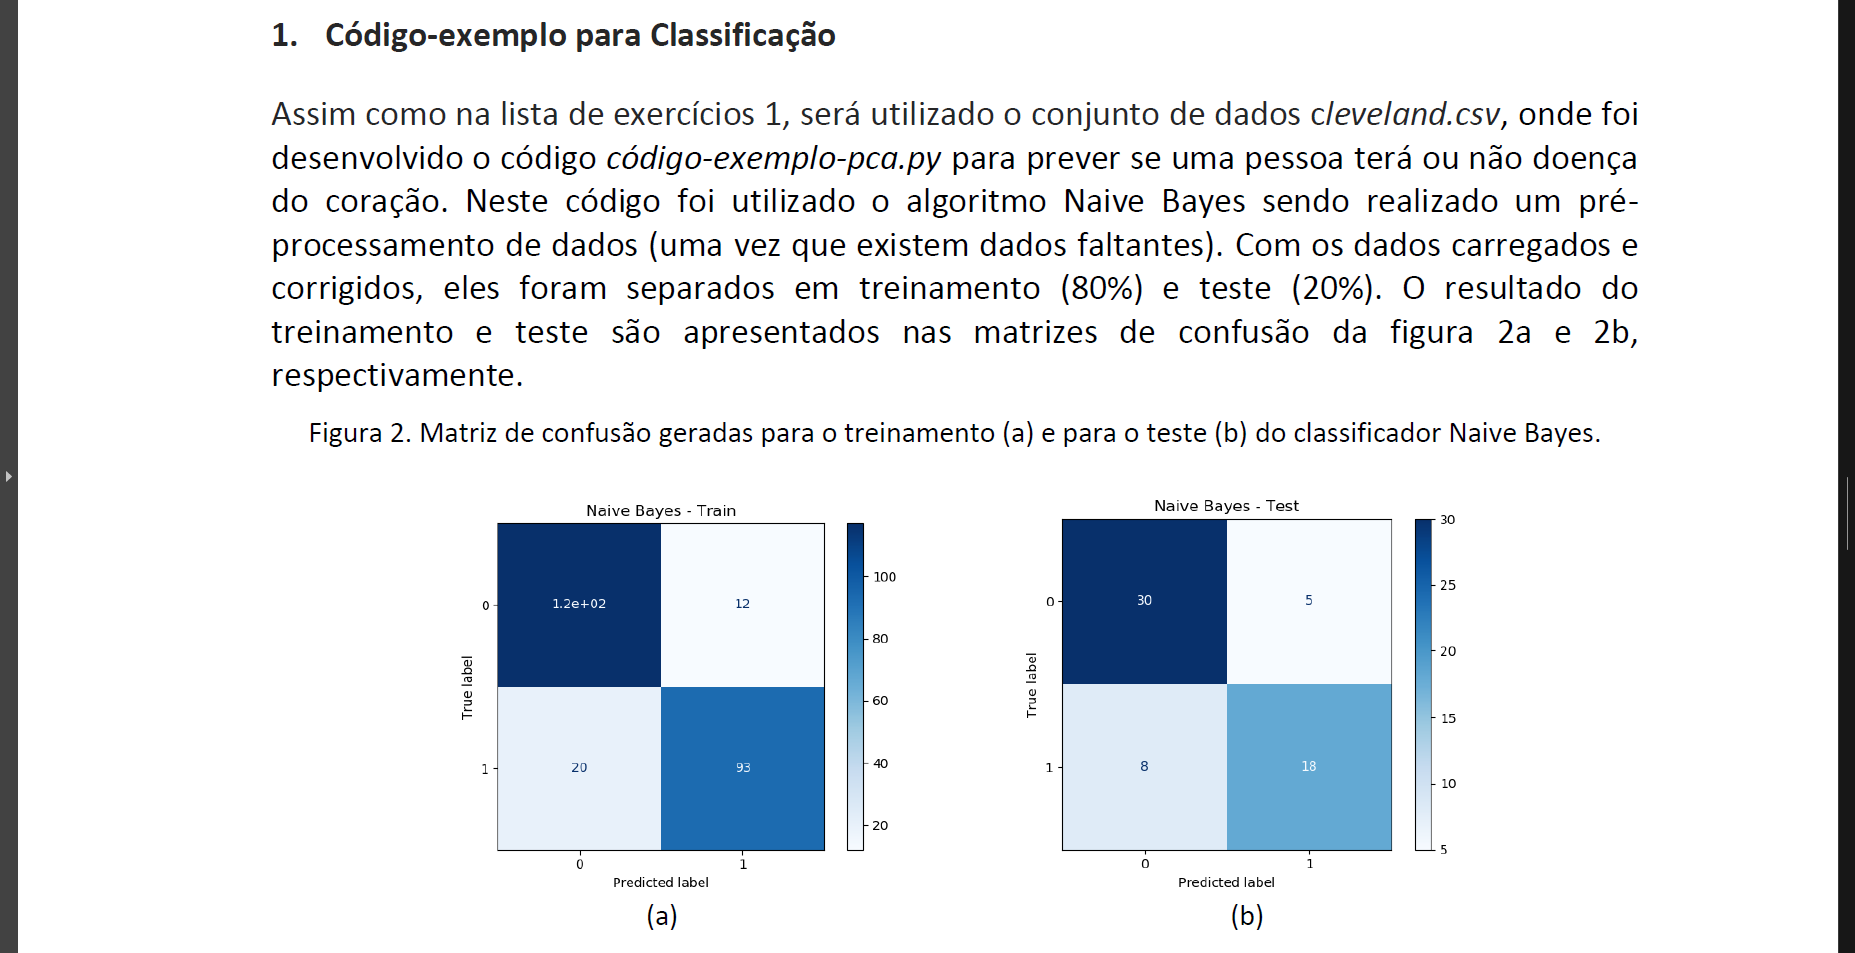

In [ ]:
# cleveland.csv
clev = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Reconhecimentos Padrões/Lista-02/cleveland.csv', header = None)
clev.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

################################## data preprocessing ####################################################

### Mapeia as classes transformando o problema em binário
clev['target'] = clev.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})

### Verifica se há valores nulos
print(clev.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64


In [ ]:
### Substitui os valores nulos pela média ##
clev.replace([np.inf, -np.inf], np.nan, inplace=True)
clev.fillna(clev.mean(), inplace=True)
############################################

In [ ]:
print(f"y: {sorted(Counter(clev['target']).items())}")

y: [(0, 164), (1, 139)]


In [ ]:
X = clev.iloc[:, :-1].values
y = clev.iloc[:, -1].values

## Separa os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
### Normaliza os dados ###############################
from sklearn.preprocessing import StandardScaler

# Cria uma instância do StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
#y_train = scaler.fit_transform(y_train)
#y_test = scaler.fit_transform(y_test)
######################################################

In [ ]:
### Aplica PCA #######################################
from sklearn.decomposition import PCA
# Cria o classificador PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
######################################################

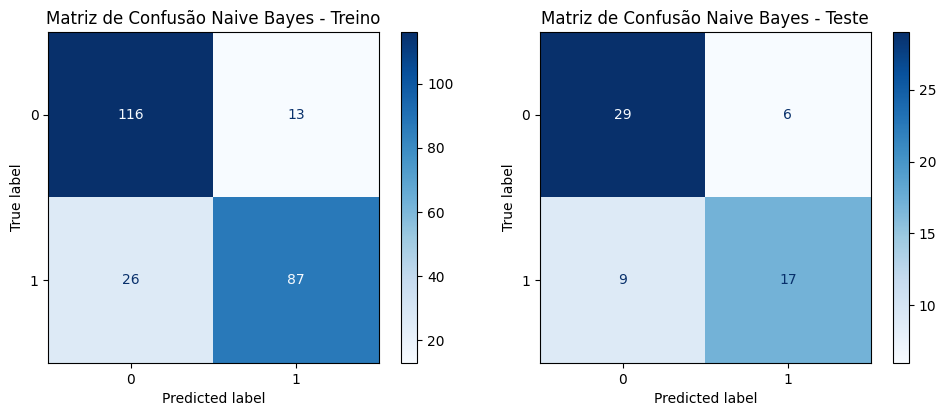


Accuracy for training set for Naive Bayes = 0.8388429752066116
Accuracy for test set for Naive Bayes = 0.7540983606557377


In [ ]:
#########################################   Naive Bayes  #############################################################

# Treinamento Modelo
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()
model_nb.fit(X_train_pca, y_train)

# Resultados
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred_train_nb = model_nb.predict(X_train_pca)
y_pred_test_nb = model_nb.predict(X_test_pca)

# Calcular as matrizes de confusão
cm_train_nb = confusion_matrix(y_train, y_pred_train_nb, labels=model_nb.classes_)
cm_test_nb = confusion_matrix(y_test, y_pred_test_nb, labels=model_nb.classes_)

# Criar as instâncias de ConfusionMatrixDisplay
cm_disp_train_nb = ConfusionMatrixDisplay(confusion_matrix=cm_train_nb, display_labels=model_nb.classes_)
cm_disp_test_nb = ConfusionMatrixDisplay(confusion_matrix=cm_test_nb, display_labels=model_nb.classes_)

# Criar a figura e os subplots
fig, (ax1_nb, ax2_nb) = plt.subplots(1, 2, figsize=(10, 4))

# Plotar a matriz de confusão de treino
cm_disp_train_nb.plot(ax=ax1_nb, cmap=plt.cm.Blues)
ax1_nb.set_title('Matriz de Confusão Naive Bayes - Treino')

# Plotar a matriz de confusão de teste
cm_disp_test_nb.plot(ax=ax2_nb, cmap=plt.cm.Blues)
ax2_nb.set_title('Matriz de Confusão Naive Bayes - Teste')

# Ajustar os subplots para que fiquem bem espaçados
fig.tight_layout()

# Mostrar a figura
plt.show()

print()
print('Accuracy for training set for Naive Bayes = {}'.format((cm_train_nb[0][0] + cm_train_nb[1][1])/len(y_train)))
print('Accuracy for test set for Naive Bayes = {}'.format((cm_test_nb[0][0] + cm_test_nb[1][1])/len(y_test)))

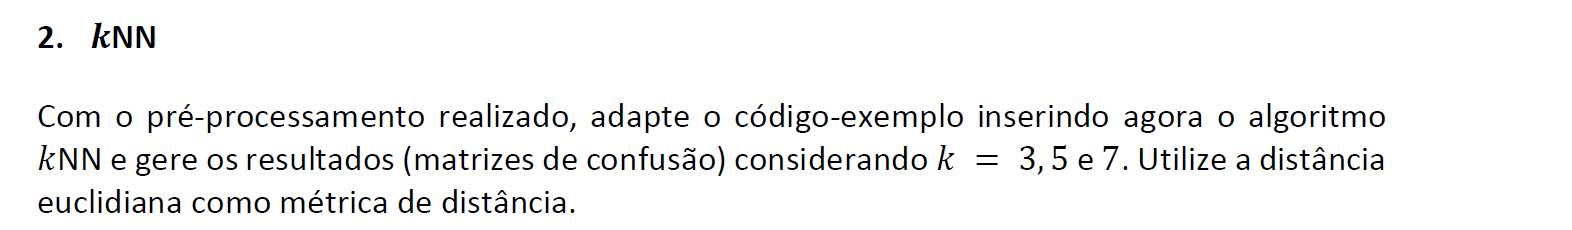

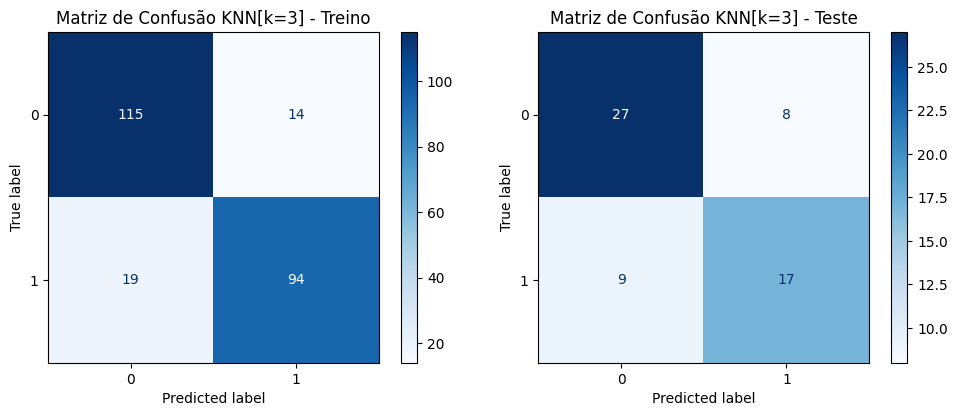


Accuracy for training set for KNN[K=3] = 0.8636363636363636
Accuracy for test set for KNN[K=3] = 0.7213114754098361


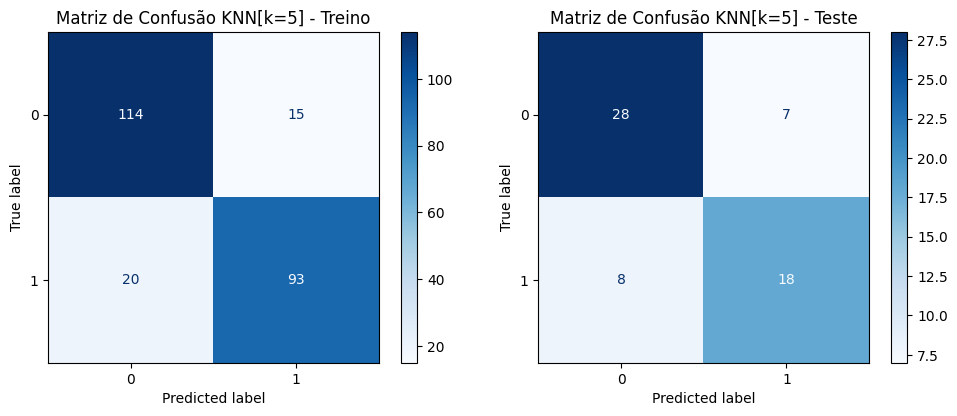


Accuracy for training set for KNN[K=5] = 0.8553719008264463
Accuracy for test set for KNN[K=5] = 0.7540983606557377


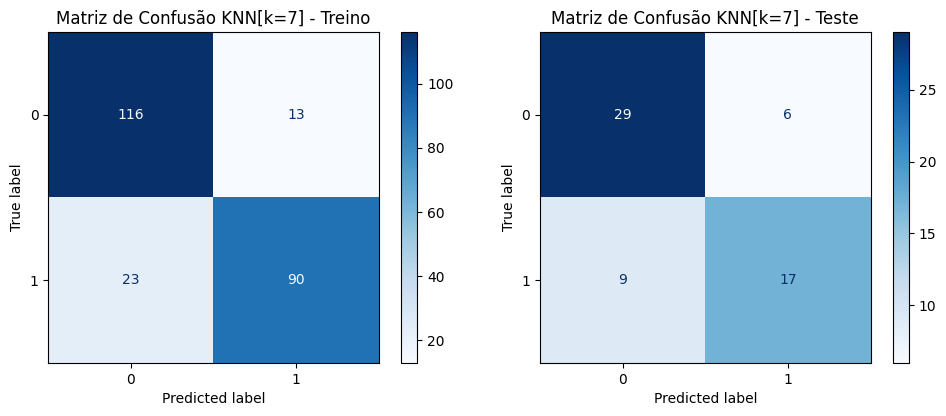


Accuracy for training set for KNN[K=7] = 0.8512396694214877
Accuracy for test set for KNN[K=7] = 0.7540983606557377


In [ ]:
# cria um classificador k-NN com k = 3, 5 e 7
cm_train_knn = dict([]);
cm_test_knn = dict([]);
y_pred_test_knn = dict([]);
model_knn = dict([]);
for k in [3, 5, 7]:
    # Cria o classificador k-NN
    model_knn[k] = KNeighborsClassifier(n_neighbors=k, metric='euclidean')

    # Treina o classificador k-NN nos dados de treino reduzidos por PCA
    model_knn[k].fit(X_train_pca, y_train)

    y_pred_train_knn = model_knn[k].predict(X_train_pca)
    y_pred_test_knn[k] = model_knn[k].predict(X_test_pca)

    # Calcular as matrizes de confusão
    cm_train_knn[k] = confusion_matrix(y_train, y_pred_train_knn, labels=model_knn[k].classes_)
    cm_test_knn[k] = confusion_matrix(y_test, y_pred_test_knn[k], labels=model_knn[k].classes_)

    # Criar as instâncias de ConfusionMatrixDisplay
    cm_disp_train_knn = ConfusionMatrixDisplay(confusion_matrix=cm_train_knn[k], display_labels=model_knn[k].classes_)
    cm_disp_test_knn = ConfusionMatrixDisplay(confusion_matrix=cm_test_knn[k], display_labels=model_knn[k].classes_)

    # Criar a figura e os subplots
    fig, (ax1_knn, ax2_knn) = plt.subplots(1, 2, figsize=(10, 4))

    # Plotar a matriz de confusão de treino
    cm_disp_train_knn.plot(ax=ax1_knn, cmap=plt.cm.Blues)
    ax1_knn.set_title('Matriz de Confusão KNN[k={}] - Treino'.format(k))

    # Plotar a matriz de confusão de teste
    cm_disp_test_knn.plot(ax=ax2_knn, cmap=plt.cm.Blues)
    ax2_knn.set_title('Matriz de Confusão KNN[k={}] - Teste'.format(k))

    # Ajustar os subplots para que fiquem bem espaçados
    fig.tight_layout()

    # Mostrar a figura
    plt.show()

    print()
    print('Accuracy for training set for KNN[K={}] = {}'.format(k, (cm_train_knn[k][0][0] + cm_train_knn[k][1][1])/len(y_train)))
    print('Accuracy for test set for KNN[K={}] = {}'.format(k, (cm_test_knn[k][0][0] + cm_test_knn[k][1][1])/len(y_test)))

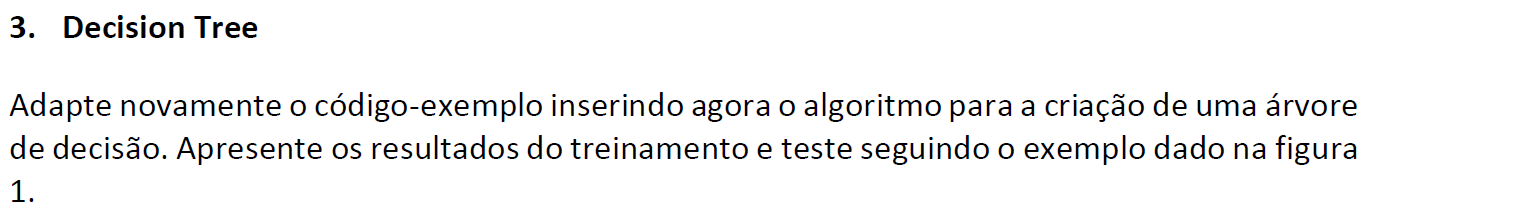

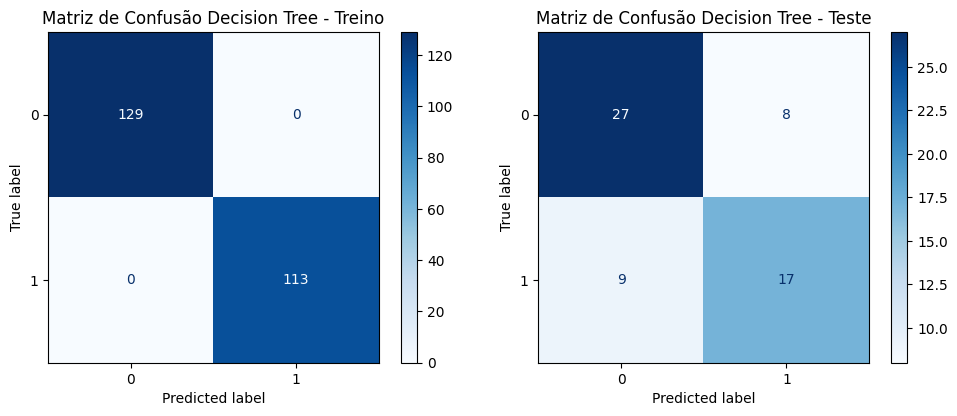


Accuracy for training set for Decision Tree = 1.0
Accuracy for test set for Decision Tree = 0.7213114754098361


In [ ]:
#########################################   Decision Tree  #############################################################
# Treinamento Modelo
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train_pca, y_train)

y_pred_train_dt = model_dt.predict(X_train_pca)
y_pred_test_dt = model_dt.predict(X_test_pca)

# Calcular as matrizes de confusão
cm_train_dt = confusion_matrix(y_train, y_pred_train_dt, labels=model_dt.classes_)
cm_test_dt = confusion_matrix(y_test, y_pred_test_dt, labels=model_dt.classes_)

# Criar as instâncias de ConfusionMatrixDisplay
cm_disp_train_dt = ConfusionMatrixDisplay(confusion_matrix=cm_train_dt, display_labels=model_dt.classes_)
cm_disp_test_dt = ConfusionMatrixDisplay(confusion_matrix=cm_test_dt, display_labels=model_dt.classes_)

# Criar a figura e os subplots
fig, (ax1_dt, ax2_dt) = plt.subplots(1, 2, figsize=(10, 4))

# Plotar a matriz de confusão de treino
cm_disp_train_dt.plot(ax=ax1_dt, cmap=plt.cm.Blues)
ax1_dt.set_title('Matriz de Confusão Decision Tree - Treino')

# Plotar a matriz de confusão de teste
cm_disp_test_dt.plot(ax=ax2_dt, cmap=plt.cm.Blues)
ax2_dt.set_title('Matriz de Confusão Decision Tree - Teste')

# Ajustar os subplots para que fiquem bem espaçados
fig.tight_layout()

# Mostrar a figura
plt.show()

print()
print('Accuracy for training set for Decision Tree = {}'.format((cm_train_dt[0][0] + cm_train_dt[1][1])/len(y_train)))
print('Accuracy for test set for Decision Tree = {}'.format((cm_test_dt[0][0] + cm_test_dt[1][1])/len(y_test)))

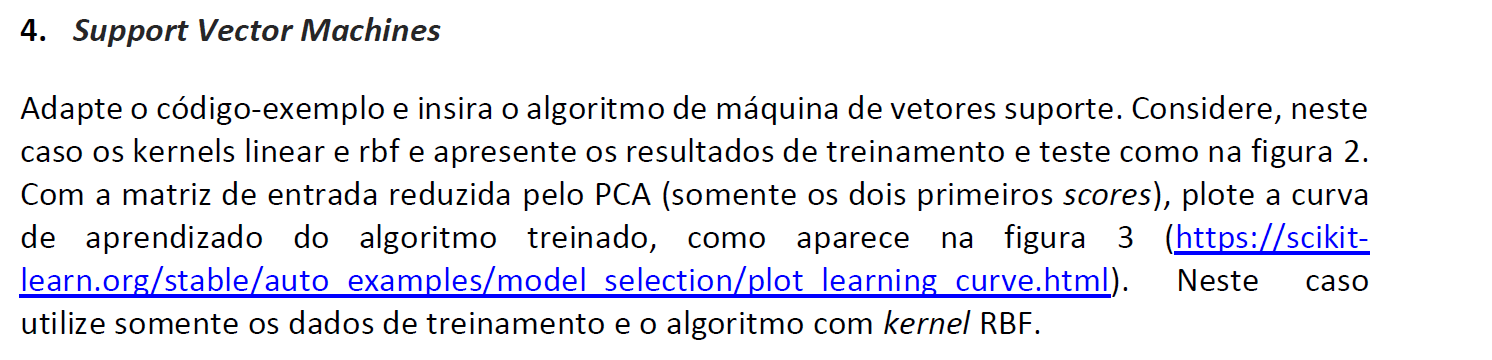

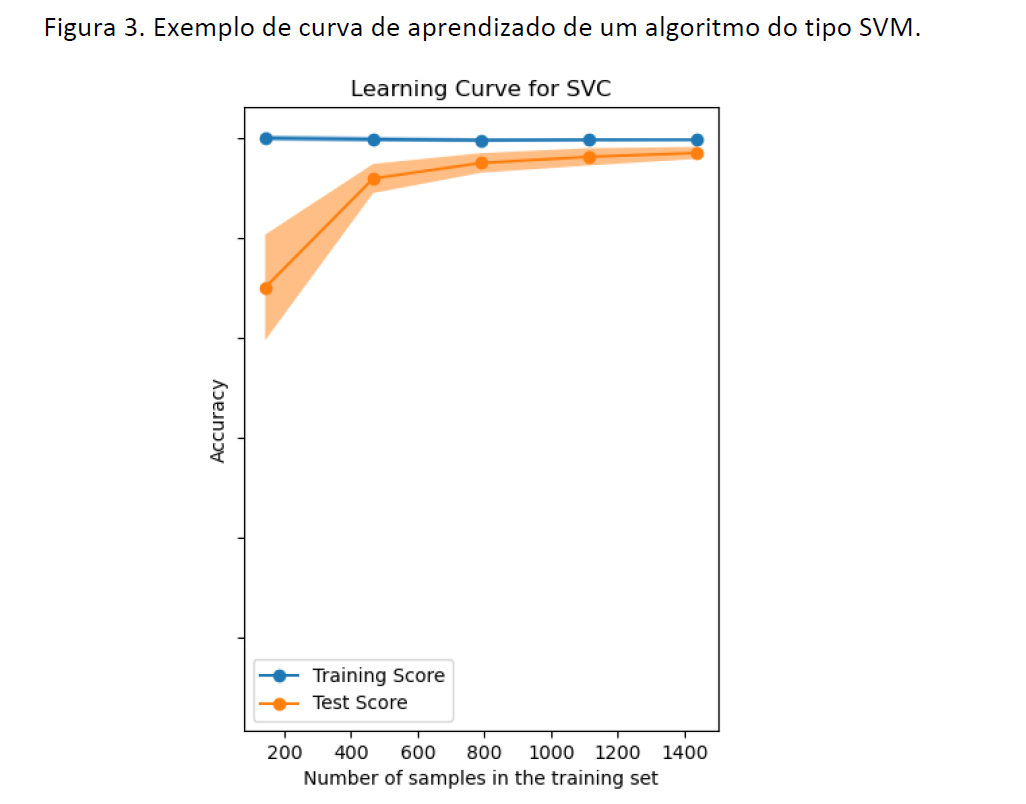

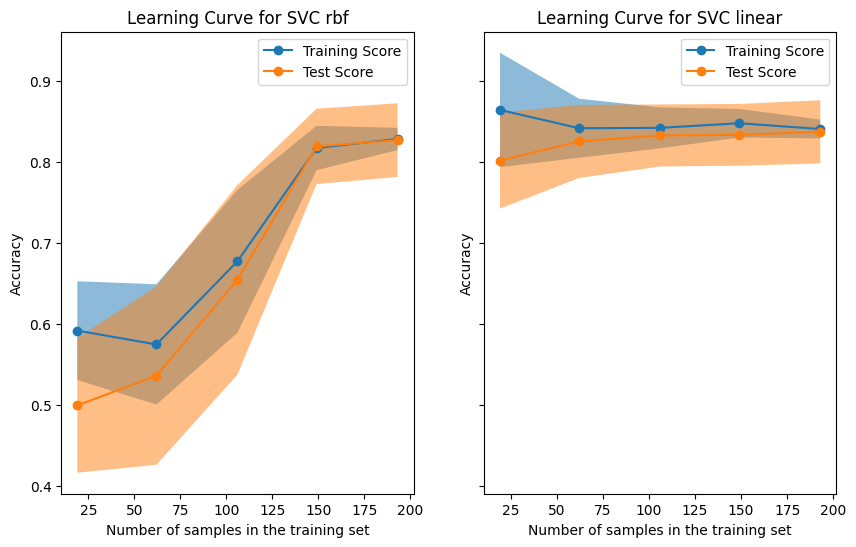

In [ ]:
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit
from sklearn.svm import SVC

svc_rfb = SVC(kernel="rbf", gamma=0.001)
svc_linear = SVC(kernel="linear", gamma=0.001)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6), sharey=True)

common_params = {
    "X": X_train_pca,
    "y": y_train,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

for ax_idx, estimator in enumerate([svc_rfb, svc_linear]):
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].legend(handles[:2], ["Training Score", "Test Score"])
    ax[ax_idx].set_title(f"Learning Curve for SVC {estimator.kernel}")

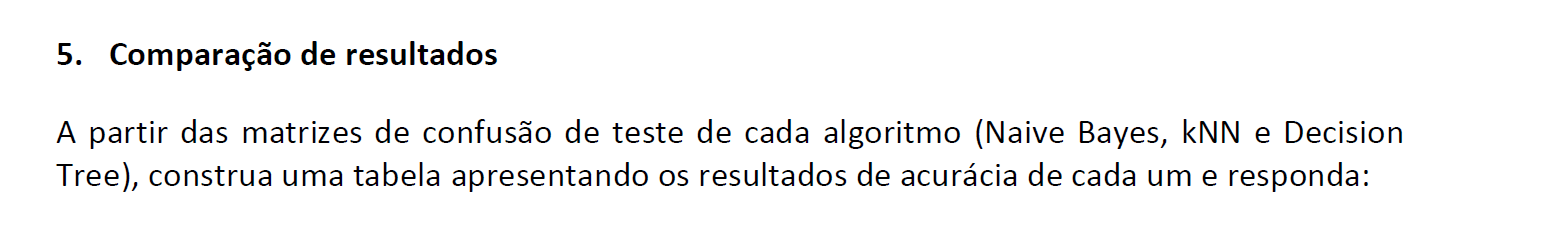

In [ ]:
accuracy_naive_bayes = accuracy_score(y_test, y_pred_test_nb)
accuracy_knn_3 = accuracy_score(y_test, y_pred_test_knn[3])
accuracy_knn_5 = accuracy_score(y_test, y_pred_test_knn[5])
accuracy_knn_7 = accuracy_score(y_test, y_pred_test_knn[7])
accuracy_decision_tree = accuracy_score(y_test, y_pred_test_dt)

accuracy_data = pd.DataFrame({'Modelo': ['Naive Bayes', 'kNN[k=3]', 'kNN[k=5]', 'kNN[k=7]', 'Decision Tree'],
                        'Acurácia': [accuracy_naive_bayes, accuracy_knn_3, accuracy_knn_5, accuracy_knn_7, accuracy_decision_tree]})

# Exibir a tabela de resultados
print(accuracy_data)

          Modelo  Acurácia
0    Naive Bayes  0.754098
1       kNN[k=3]  0.721311
2       kNN[k=5]  0.754098
3       kNN[k=7]  0.754098
4  Decision Tree  0.721311


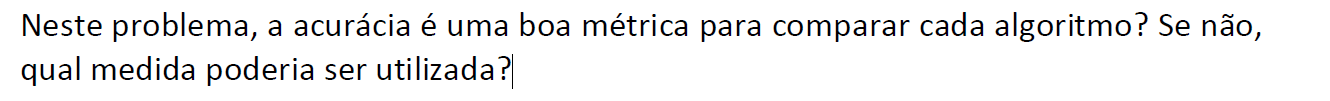

Nesse problema acurário não é uma boa metrica já que não evidencia diferença entre os modelos, nesse caso pode ser utilizar curva ROC(AUC-ROC) para comparar os modelos.

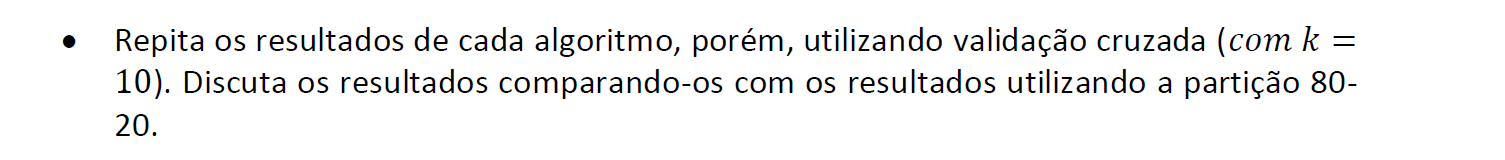

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, train_test_split

cv_scores_nb = cross_val_score(model_nb, X, y, cv=10)
cv_scores_knn_3 = cross_val_score(model_knn[3], X, y, cv=10)
cv_scores_knn_5 = cross_val_score(model_knn[5], X, y, cv=10)
cv_scores_knn_7 = cross_val_score(model_knn[7], X, y, cv=10)
cv_scores_dt = cross_val_score(model_dt, X, y, cv=10)

cv_score_data = pd.DataFrame({'Modelo': ['Naive Bayes', 'kNN[k=3]', 'kNN[k=5]', 'kNN[k=7]', 'Decision Tree'],
                        'Acurácia Média': [np.mean(cv_scores_nb), np.mean(cv_scores_knn_3), np.mean(cv_scores_knn_5), np.mean(cv_scores_knn_7), np.mean(cv_scores_dt)],
                        'Desvio Padrão': [np.std(cv_scores_nb), np.std(cv_scores_knn_3), np.std(cv_scores_knn_5), np.std(cv_scores_knn_7), np.std(cv_scores_dt)]})

# Exibir a tabela de resultados
print(cv_score_data)

          Modelo  Acurácia Média  Desvio Padrão
0    Naive Bayes        0.847957       0.063699
1       kNN[k=3]        0.633656       0.093147
2       kNN[k=5]        0.656774       0.097495
3       kNN[k=7]        0.670000       0.089068
4  Decision Tree        0.768172       0.082735


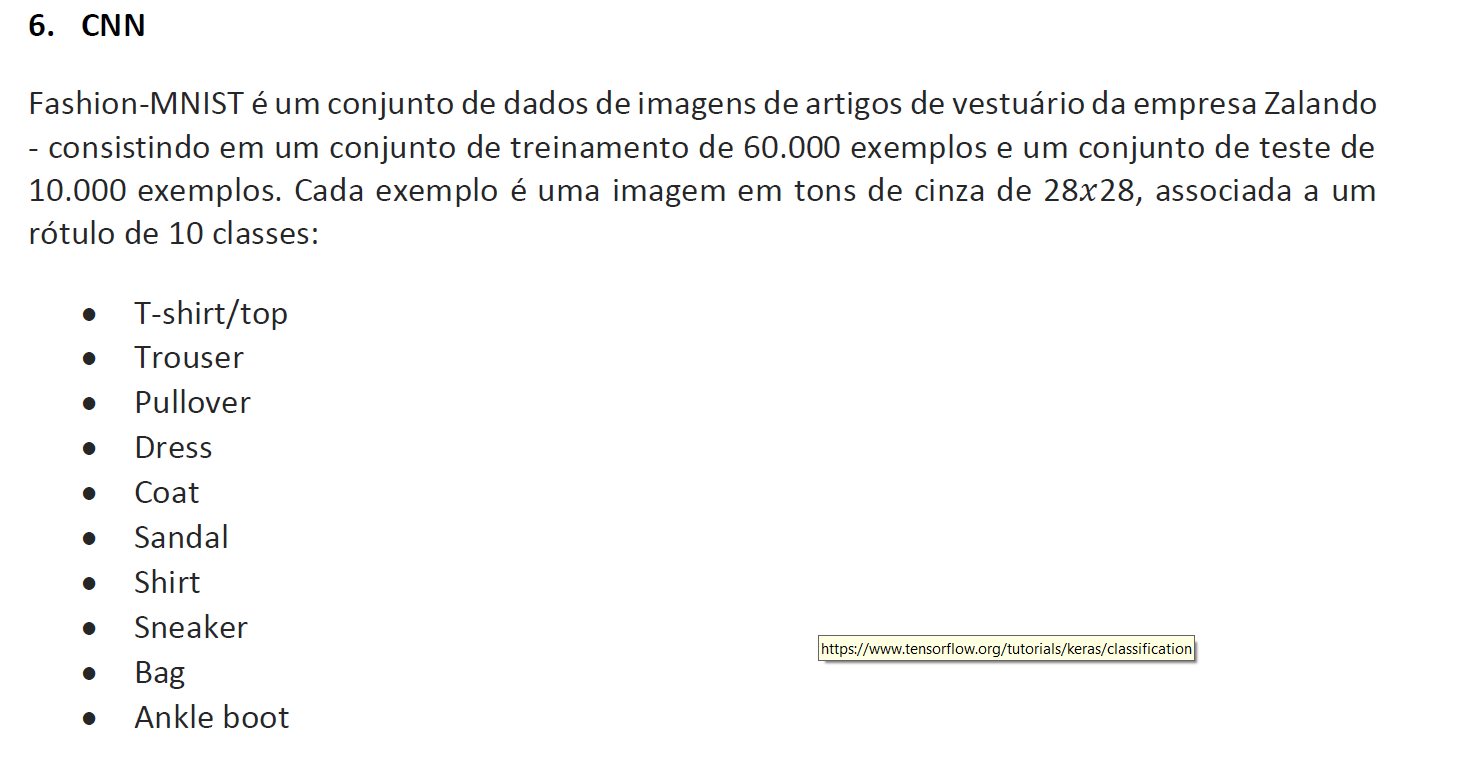

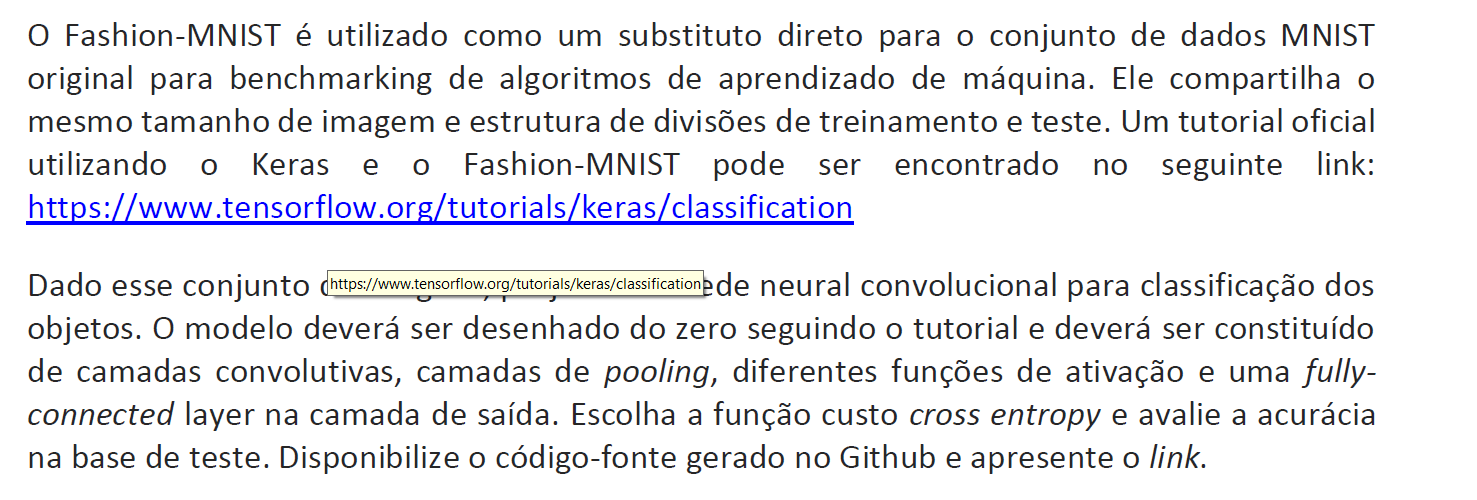

In [ ]:
# TensorFlow e tf.keras
import tensorflow as tf
from tensorflow import keras

# Bibliotecas Auxiliares
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.12.0


In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

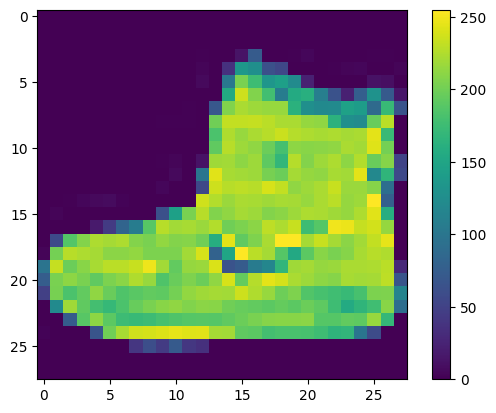

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

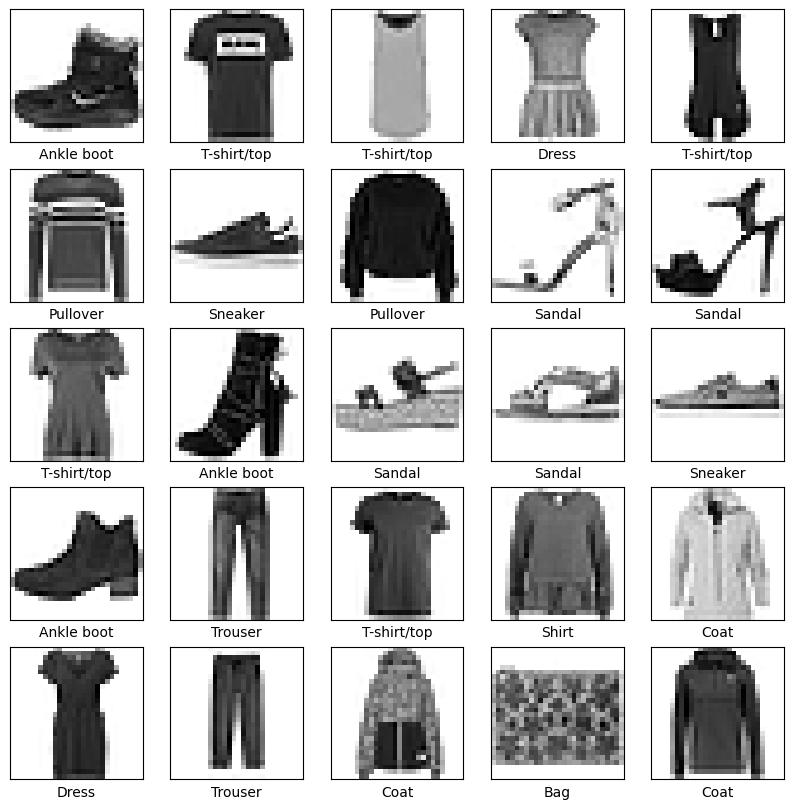

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
model = keras.Sequential(
    [
        keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
        keras.layers.MaxPooling2D((2, 2)),
        keras.layers.Conv2D(64, (3, 3), activation="sigmoid"),
        keras.layers.MaxPooling2D((2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dense(128, activation="relu"),
        keras.layers.Dense(10, activation="softmax"),
    ]
)

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 82s 41ms/step - loss: 0.6338 - accuracy: 0.7599
Epoch 2/10
1875/1875 [==============================] - 72s 38ms/step - loss: 0.3763 - accuracy: 0.8624
Epoch 3/10
1875/1875 [==============================] - 75s 40ms/step - loss: 0.3298 - accuracy: 0.8800
Epoch 4/10
1875/1875 [==============================] - 73s 39ms/step - loss: 0.3006 - accuracy: 0.8898
Epoch 5/10
1875/1875 [==============================] - 76s 40ms/step - loss: 0.2772 - accuracy: 0.8981
Epoch 6/10
1875/1875 [==============================] - 74s 40ms/step - loss: 0.2605 - accuracy: 0.9041
Epoch 7/10
1875/1875 [==============================] - 73s 39ms/step - loss: 0.2474 - accuracy: 0.9082
Epoch 8/10
1875/1875 [==============================] - 71s 38ms/step - loss: 0.2348 - accuracy: 0.9125
Epoch 9/10
1875/1875 [==============================] - 69s 37ms/step - loss: 0.2259 - accuracy: 0.9154
Epoch 10/10
1875/1875 [==============================] - 75s 40m

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 4s - loss: 0.2682 - accuracy: 0.9010 - 4s/epoch - 14ms/step

Test accuracy: 0.9010000228881836


In [ ]:
predictions = model.predict(test_images)

313/313 [==============================] - 3s 10ms/step


In [ ]:
predictions[0]

array([5.46833462e-07, 4.43774961e-10, 1.09672555e-08, 2.04113242e-08,
       2.59879174e-10, 2.92169978e-04, 1.56849500e-09, 2.18026235e-05,
       6.69501884e-11, 9.99685526e-01], dtype=float32)

In [ ]:
np.argmax(predictions[0])

9

In [ ]:
test_labels[0]

9

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

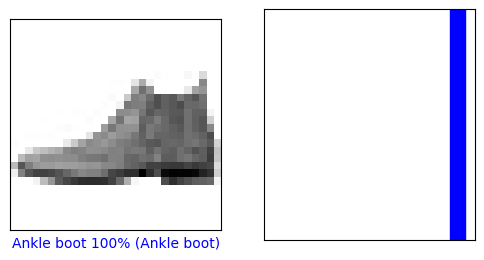

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

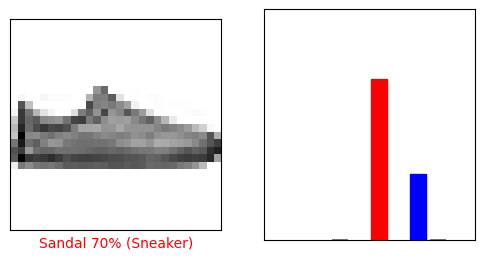

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

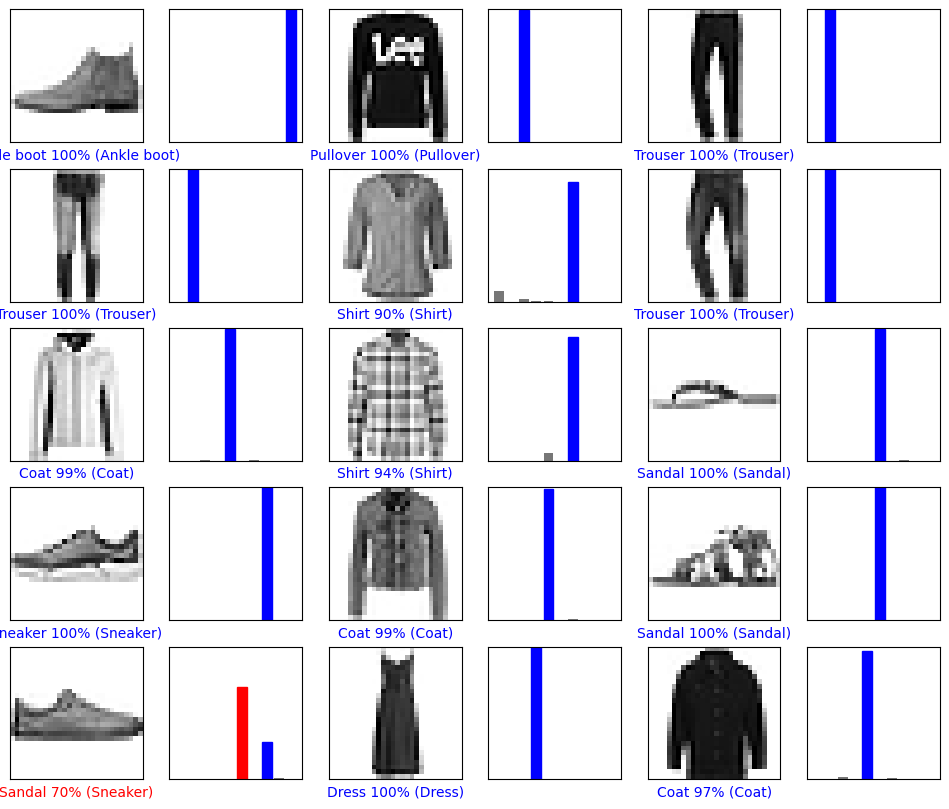

In [ ]:
# Plota o primeiro X test images, e as labels preditas, e as labels verdadeiras.
# Colore as predições corretas de azul e as incorretas de vermelho.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [ ]:
# Grab an image from the test dataset.
img = test_images[0]

print(img.shape)

(28, 28)


In [ ]:
# Adiciona a imagem em um batch que possui um só membro.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [ ]:
predictions_single = model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 26ms/step
[[5.4683295e-07 4.4377413e-10 1.0967214e-08 2.0411285e-08 2.5987817e-10
  2.9217027e-04 1.5684920e-09 2.1802623e-05 6.6950057e-11 9.9968553e-01]]


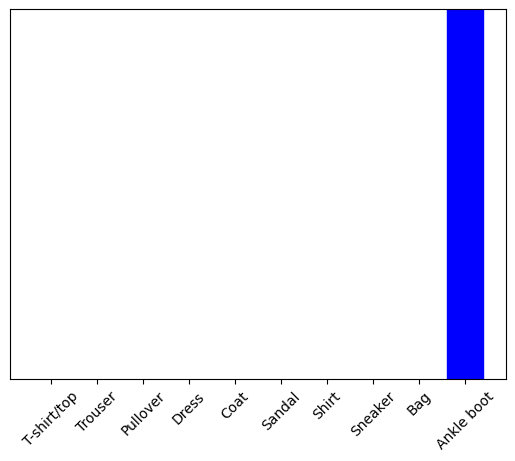

In [ ]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [ ]:
np.argmax(predictions_single[0])

9